<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/ResNet50RDC_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from tensorflow.keras.layers import Input , Lambda , Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


IMAGE_SIZE = [224,224]

TrainFolder = "/content/drive/MyDrive/Data (2)/Data/Train"
TestFolder = "/content/drive/MyDrive/Data (2)/Data/Test"

In [68]:
myResnet = ResNet50(input_shape= IMAGE_SIZE+[3] , weights='imagenet', include_top=False ) # include_top=False ==> remove the fully connected layer

print ( myResnet.summary() )

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [69]:
for layer in myResnet.layers:
    layer.trainable = False # we dont need to train the model . It is already trained

# classes
Classes = glob('/content/drive/MyDrive/Data (2)/Data/Train/*') #dont forget the /*
#Classes = "/content/drive/MyDrive/Data (2)/Data/Train/*"
print(Classes)


['/content/drive/MyDrive/Data (2)/Data/Train/Neem', '/content/drive/MyDrive/Data (2)/Data/Train/Ashoka', '/content/drive/MyDrive/Data (2)/Data/Train/Aloe_Vera']


In [70]:
classesNum = len(Classes)
print(classesNum)

3


In [71]:
# continue with the next layers of the model :

# add Flatten layer
PlusFlattenlayer = Flatten()(myResnet.output)

# add a Dense layer with our classes
prediction = Dense(classesNum, activation='softmax')(PlusFlattenlayer)

In [106]:
# create the model amd add tje mew layers

model = Model(inputs=myResnet.input , outputs=prediction)

print (model.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [107]:
# compile the model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [108]:
# images augmentaion

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1. /255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

training_set = train_datagen.flow_from_directory(TrainFolder, target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = test_datagen.flow_from_directory(TestFolder,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 90 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [110]:
# fit the model
result = model.fit(training_set ,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/50
3/3 [==============================] - 28s 9s/step - loss: 7.7675 - accuracy: 0.3333 - val_loss: 2.7251 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 27s 9s/step - loss: 6.8050 - accuracy: 0.3000 - val_loss: 5.9847 - val_accuracy: 0.3333
Epoch 3/50
3/3 [==============================] - 24s 8s/step - loss: 6.1407 - accuracy: 0.3111 - val_loss: 4.2831 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 21s 8s/step - loss: 2.6333 - accuracy: 0.4333 - val_loss: 3.3766 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 24s 9s/step - loss: 4.2536 - accuracy: 0.3556 - val_loss: 3.4797 - val_accuracy: 0.3333
Epoch 6/50
3/3 [==============================] - 24s 9s/step - loss: 2.5092 - accuracy: 0.5222 - val_loss: 1.2209 - val_accuracy: 0.4667
Epoch 7/50
3/3 [==============================] - 25s 9s/step - loss: 2.5600 - accuracy: 0.4111 - val_loss: 1.2164 - val_accuracy: 0.5333
Epoch 8/50
3/3 [==================

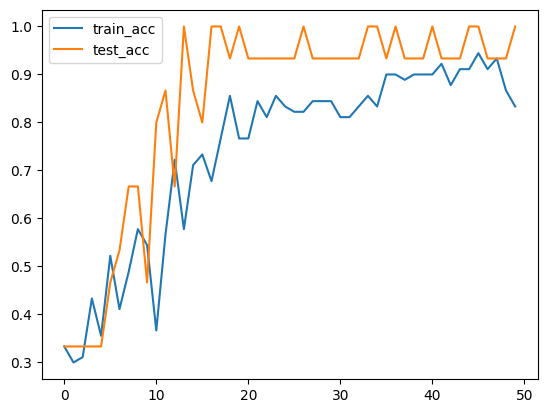

In [111]:
# plot the result

# plot the accuracy
plt.plot(result.history['accuracy'],label='train_acc')
plt.plot(result.history['val_accuracy'],label='test_acc')
plt.legend()
plt.show()

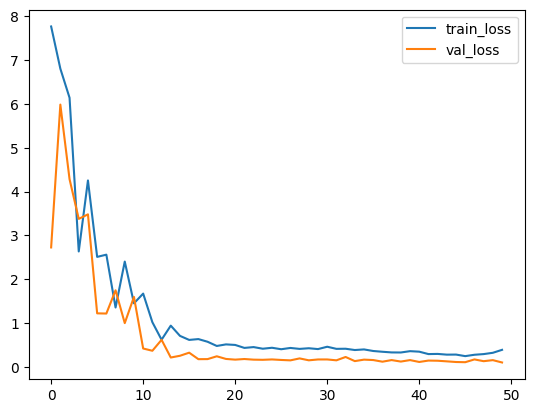

In [112]:
#plot the loss
plt.plot(result.history['loss'],label='train_loss')
plt.plot(result.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [113]:
model.save('C:/RiceDiseases/RDC_Model.h5')

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

from keras.preprocessing import image
#from keras.preprocessing.image import load_img , img_to_array
import numpy as np

categories = ['Aloe_Vera','Ashoka','Neem']

model = tf.keras.models.load_model('/content/C:/RiceDiseases/RDC_Model.h5')
print (model.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [119]:
# lets create a function to prepare the image for the prediction

from keras.preprocessing import image
from tensorflow.keras.utils import load_img , img_to_array

def preprareImage(PathForImage):
    image = load_img(PathForImage, target_size=(224,224))
    imgResult = img_to_array(image)
    imgResult = np.expand_dims(imgResult, axis = 0)
    imgResult = imgResult / 255.
    return imgResult

testImage = "/content/drive/MyDrive/Data (2)/Data/Train/Neem/images (11).jpg"

imgForModel = preprareImage(testImage)
resultArray = model.predict(imgForModel, verbose=1)
answer = np.argmax(resultArray, axis=1)

print(answer)

index = answer[0]

print("Predicted Leaf is: "+ categories[index])


1/1 [==============================] - 0s 388ms/step
[2]
Predicted Leaf is: Neem


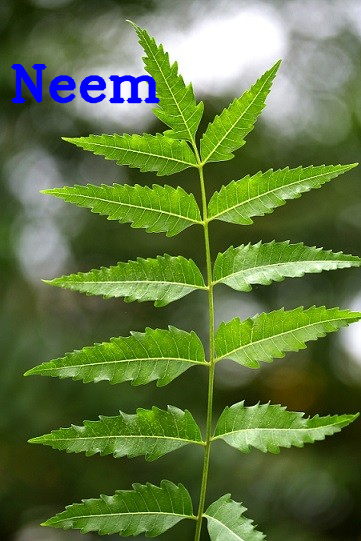

-1

In [120]:
#from google.colab.patches import cv2_imshow
img = cv2.imread(testImage)
cv2.putText(img,categories[index] , (10,100), cv2.FONT_HERSHEY_COMPLEX , 1.6 , (255,0,0), 3, cv2.LINE_AA)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

cv2.waitKey(0)